In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Here is the algorithm

# Procedures for the below work

1. Create the file for Train and Test Data from the data given
2. Insert Sales list using for loop for each record according to the conditons
     if stock = demand ....sales = damand
     if stock > demand ....sales = demand
     if demand > stock ....sales = stock

3. Calculate profit using for loop according to
         profit = sales - stock....we assume remaining stock went bad
         
4. Using scipy model ...get the model y = ax + c for our data of profit and demand

5. Draw a regression plot for the data
6. Using linear_model to test again our regression if it matches
7. prepare data for demand to be used to predict profit
8.  Predict the profit values and apppend them to the data
9. Join the train and test data sets while fully complted
9. Create a sqlite table and dump the data

In [3]:
dir(sqlalchemy)

['ARRAY',
 'BIGINT',
 'BINARY',
 'BLANK_SCHEMA',
 'BLOB',
 'BOOLEAN',
 'BigInteger',
 'Binary',
 'Boolean',
 'CHAR',
 'CLOB',
 'CheckConstraint',
 'Column',
 'ColumnDefault',
 'Constraint',
 'DATE',
 'DATETIME',
 'DDL',
 'DECIMAL',
 'Date',
 'DateTime',
 'DefaultClause',
 'Enum',
 'FLOAT',
 'FetchedValue',
 'Float',
 'ForeignKey',
 'ForeignKeyConstraint',
 'INT',
 'INTEGER',
 'Index',
 'Integer',
 'Interval',
 'JSON',
 'LargeBinary',
 'MetaData',
 'NCHAR',
 'NUMERIC',
 'NVARCHAR',
 'Numeric',
 'PassiveDefault',
 'PickleType',
 'PrimaryKeyConstraint',
 'REAL',
 'SMALLINT',
 'Sequence',
 'SmallInteger',
 'String',
 'TEXT',
 'TIME',
 'TIMESTAMP',
 'Table',
 'Text',
 'ThreadLocalMetaData',
 'Time',
 'TypeDecorator',
 'Unicode',
 'UnicodeText',
 'UniqueConstraint',
 'VARBINARY',
 'VARCHAR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__go',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_util',
 'alias',
 'all_',
 'and_',
 

In [4]:
#create a dictionary with our train data
train = {"period_in_weeks":[1 ,2,3,4, 5, 6,7] , "Demand":[1500 , 2000 ,3500 ,5000 , 6000 , 6550 , 8000] \
        , "Stocks":[1500 , 2500 , 3000 , 4500 , 6500 , 7000 , 7550]}

In [5]:
#convert dictionary to a dataframe
train = pd.DataFrame(train)
#check the size of records
size = train.shape[0]
train
        

,period_in_weeks,Demand,Stocks
0,1,1500,1500
1,2,2000,2500
2,3,3500,3000
3,4,5000,4500
4,5,6000,6500
5,6,6550,7000
6,7,8000,7550


In [6]:
#convert the stocks and demand data into list
Demand =list(train["Demand"])
Stocks =list(train["Stocks"])
#create a sales list
Sales = []
#function to update sales
def addSales(data):
    for i in range(data.shape[0]):
        if Stocks[i] == Demand[i]:
            Sales.append(Stocks[i])
        elif Stocks[i] < Demand[i]:
            Sales.append(Stocks[i])
        elif Stocks[i] > Demand[i]:
            Sales.append(Demand[i])
#             print("yess")
addSales(train)
#create a column Sales and add the items in sales list
train["Sales"] = Sales
train


,period_in_weeks,Demand,Stocks,Sales
0,1,1500,1500,1500
1,2,2000,2500,2000
2,3,3500,3000,3000
3,4,5000,4500,4500
4,5,6000,6500,6000
5,6,6550,7000,6550
6,7,8000,7550,7550


In [7]:
#calculating profit
# profit = (sales -stocks)
#we assume that leftover goes bad
#profit list
Profit = []
#function to get profits
def getProfit(data):
    for i in range(data.shape[0]):
        profit =Sales[i] - Stocks[i]
        Profit.append(profit)
    
getProfit(train)
#create the column Profit and populate it with data
train["Profit"] = Profit

In [8]:
test = {"period_in_weeks":[8,9,10,11] , "Demand":[8750 , 9000 , 9500 , 10000]}

In [9]:
test = pd.DataFrame(test)
test

,period_in_weeks,Demand
0,8,8750
1,9,9000
2,10,9500
3,11,10000


In [10]:
# lets join the two tables
df = pd.concat([train ,test] , axis = 0 , sort = False)
df

,period_in_weeks,Demand,Stocks,Sales,Profit
0,1,1500,1500.0,1500.0,0.0
1,2,2000,2500.0,2000.0,-500.0
2,3,3500,3000.0,3000.0,0.0
3,4,5000,4500.0,4500.0,0.0
4,5,6000,6500.0,6000.0,-500.0
5,6,6550,7000.0,6550.0,-450.0
6,7,8000,7550.0,7550.0,0.0
0,8,8750,NaN,NaN,NaN
1,9,9000,NaN,NaN,NaN
2,10,9500,NaN,NaN,NaN


In [11]:
#checking the correlation bettween thedata posted
df.corr()
#from here we are able to see that 
#the data has all high correration that is positive except for profit which 
#shows verry little relationship with the rest


,period_in_weeks,Demand,Stocks,Sales,Profit
period_in_weeks,1.000000,0.982877,0.984082,0.991670,-0.119204
Demand,0.982877,1.000000,0.979855,0.994461,-0.054607
Stocks,0.984082,0.979855,1.000000,0.994291,-0.243129
Sales,0.991670,0.994461,0.994291,1.000000,-0.138239
Profit,-0.119204,-0.054607,-0.243129,-0.138239,1.000000


In [12]:
#checking data description
df.describe()

,period_in_weeks,Demand,Stocks,Sales,Profit
count,11.000000,11.000000,7.000000,7.000000,7.000000
mean,6.000000,6345.454545,4650.000000,4442.857143,-207.142857
std,3.316625,3021.626594,2402.949576,2353.442261,258.889570
min,1.000000,1500.000000,1500.000000,1500.000000,-500.000000
25%,3.500000,4250.000000,2750.000000,2500.000000,-475.000000
50%,6.000000,6550.000000,4500.000000,4500.000000,0.000000
75%,8.500000,8875.000000,6750.000000,6275.000000,0.000000
max,11.000000,10000.000000,7550.000000,7550.000000,0.000000


In [13]:
train = df[:size]
test = df[size:]

y = -0.5097690941385435x + 4544.404973357016


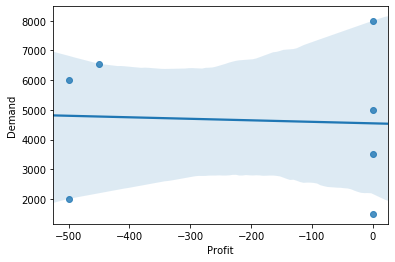

In [14]:
from scipy import stats
#lets plot regression plot
# here a means coefficient of dependent variable
# b means intercept
# c means  r 
# d means p values
# e means standard error

a , b, c , d  , e = stats.linregress(train["Profit"] , train["Demand"])
print("y = {}x + {}".format(a , b))
sns.regplot(x=train["Profit"] , y=train["Demand"] , data = df)
plt.show()

In [15]:
#start making linear models 
from sklearn.linear_model import LinearRegression
#prepare the datas to be used fro training
X_train = train["Profit"].values[: , np.newaxis]
Y_train = train["Demand"].values

In [16]:
#create an instance for the model
lm  = LinearRegression()
#fit your data and train the model
lm.fit(X_train , Y_train)
print("Our model is {}x + {}".format(lm.coef_ , lm.intercept_))

Our model is [-0.50976909]x + 4544.404973357016


In [17]:
#prepare testing data
Y_test = test["Demand"].values[: , np.newaxis]
#predict the profit data
prediction = lm.predict(Y_test)

In [18]:
print(prediction)

[  83.92539964  -43.51687389 -298.40142096 -553.28596803]


In [19]:
test["Profit"] = prediction
test

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,period_in_weeks,Demand,Stocks,Sales,Profit
0,8,8750,NaN,NaN,83.925400
1,9,9000,NaN,NaN,-43.516874
2,10,9500,NaN,NaN,-298.401421
3,11,10000,NaN,NaN,-553.285968


In [20]:
#lets make assumption that assume that they sales were same as Demand
#since demand is directly related to sales
test["Sales"] = test["Demand"]

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# sales + profit = stock
test["Stocks"] = test["Sales"] + test["Profit"]
test

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,period_in_weeks,Demand,Stocks,Sales,Profit
0,8,8750,8833.925400,8750,83.925400
1,9,9000,8956.483126,9000,-43.516874
2,10,9500,9201.598579,9500,-298.401421
3,11,10000,9446.714032,10000,-553.285968


In [22]:
#join the two tables
data = pd.concat([train ,test] , axis = 0 , sort = False )

In [23]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
data.to_sql("HIQ_Table" , engine)

In [24]:
#check database content
read = pd.read_sql_query('SELECT * FROM HIQ_Table' , engine)
print(read)

    index  period_in_weeks  Demand       Stocks    Sales      Profit
0       0                1    1500  1500.000000   1500.0    0.000000
1       1                2    2000  2500.000000   2000.0 -500.000000
2       2                3    3500  3000.000000   3000.0    0.000000
3       3                4    5000  4500.000000   4500.0    0.000000
4       4                5    6000  6500.000000   6000.0 -500.000000
5       5                6    6550  7000.000000   6550.0 -450.000000
6       6                7    8000  7550.000000   7550.0    0.000000
7       0                8    8750  8833.925400   8750.0   83.925400
8       1                9    9000  8956.483126   9000.0  -43.516874
9       2               10    9500  9201.598579   9500.0 -298.401421
10      3               11   10000  9446.714032  10000.0 -553.285968
